In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from expand import expand
import seaborn as sns

In [2]:
train = pd.read_csv("/home/jorge/Proyectos/datas/titanic/tables/data_cleaned/train.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train["Fare"].isnull().unique()

array([False])

In [5]:
train["Pclass"].unique()

array([3, 1, 2])

### Fare

In [61]:
train[train["Survived"]==1]["Fare"].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [62]:
train[train["Survived"]==0]["Fare"].describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

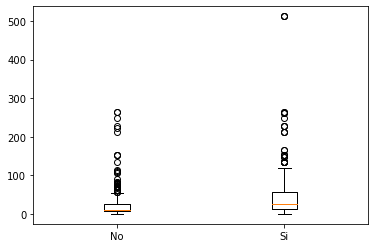

In [67]:
fig, ax = plt.subplots()

s1 = train[train["Survived"]==1]["Fare"]
s0 = train[train["Survived"]==0]["Fare"]
s = [s0, s1]
labels = ["No", "Si"]

ax.boxplot(s, labels=labels)


plt.show()

### Parch

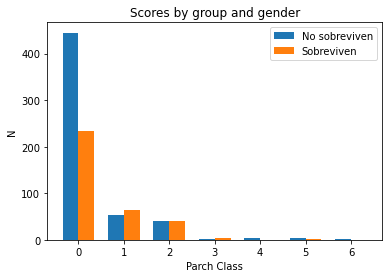

In [46]:
s1 = train.groupby("Parch")["Survived"].apply(lambda x: x[x==1].count()).values
s0 = train.groupby("Parch")["Survived"].apply(lambda x: x[x==0].count()).values
labels = [0, 1, 2, 3, 4, 5, 6]

width = 0.35 
fig, ax = plt.subplots()

x = np.arange(len(labels))

ax.bar(x - width/2, s0, width, label='No sobreviven')
ax.bar(x + width/2, s1, width, label='Sobreviven')

ax.set_xlabel('Parch Class')
ax.set_ylabel('N')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

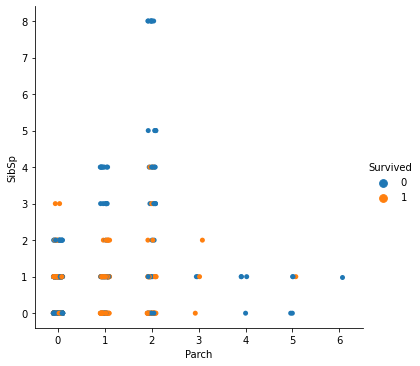

In [6]:
sns.catplot(x="Parch", y="SibSp", hue="Survived", data=train)

In [21]:
f = lambda x: x[x==True].count()/x.count()
f2 = lambda x: x.count()
por = train[["Parch", "SibSp", "Survived"]].groupby(["Parch", "SibSp"]).agg({f, f2})
por

Survived           
            <lambda_0> <lambda_1>
Parch SibSp                      
0     0            537   0.303538
      1            123   0.520325
      2             16   0.250000
      3              2   1.000000
1     0             38   0.657895
      1             57   0.596491
      2              7   0.857143
      3              7   0.000000
      4              9   0.000000
2     0             29   0.724138
      1             19   0.631579
      2              4   0.500000
      3              7   0.285714
      4              9   0.333333
      5              5   0.000000
      8              7   0.000000
3     0              1   1.000000
      1              3   0.333333
      2              1   1.000000
4     0              1   0.000000
      1              3   0.000000
5     0              2   0.000000
      1              3   0.333333
6     1              1   0.000000

In [40]:
por['Survived', '<lambda_1>'].to_numpy()

array([0.30353818, 0.5203252 , 0.25      , 1.        , 0.65789474,
       0.59649123, 0.85714286, 0.        , 0.        , 0.72413793,
       0.63157895, 0.5       , 0.28571429, 0.33333333, 0.        ,
       0.        , 1.        , 0.33333333, 1.        , 0.        ,
       0.        , 0.        , 0.33333333, 0.        ])

In [27]:
np.random.rand(10, 12)

array([[0.86765752, 0.38151119, 0.54199099, 0.91608002, 0.98005506,
        0.97457491, 0.75680295, 0.01180935, 0.33852075, 0.20302625,
        0.42718924, 0.23078723],
       [0.38654695, 0.57203658, 0.55659938, 0.97449793, 0.70321672,
        0.12170284, 0.84106024, 0.22682784, 0.45525776, 0.15378644,
        0.69545235, 0.38986222],
       [0.33735126, 0.304311  , 0.41275607, 0.98374588, 0.33541003,
        0.06134566, 0.05642158, 0.47824869, 0.21301962, 0.84093736,
        0.9796622 , 0.56279655],
       [0.77203175, 0.25075414, 0.29304425, 0.6244761 , 0.93130666,
        0.18941499, 0.66603567, 0.26574756, 0.68255863, 0.64704212,
        0.21937136, 0.78558197],
       [0.3164133 , 0.65580784, 0.07167794, 0.11608923, 0.20538969,
        0.53755152, 0.56906627, 0.44814728, 0.83447321, 0.37956686,
        0.39127673, 0.80613944],
       [0.31355004, 0.78467178, 0.56347363, 0.78002724, 0.68283518,
        0.13752987, 0.86039895, 0.83800603, 0.72779263, 0.04916953,
        0.77844816,

In [26]:
por.sort_values(('Survived', '<lambda_0>'), ascending=False)

Survived           
            <lambda_0> <lambda_1>
Parch SibSp                      
0     0            537   0.303538
      1            123   0.520325
1     1             57   0.596491
      0             38   0.657895
2     0             29   0.724138
      1             19   0.631579
0     2             16   0.250000
2     4              9   0.333333
1     4              9   0.000000
2     8              7   0.000000
      3              7   0.285714
1     3              7   0.000000
      2              7   0.857143
2     5              5   0.000000
      2              4   0.500000
3     1              3   0.333333
4     1              3   0.000000
5     1              3   0.333333
0     3              2   1.000000
5     0              2   0.000000
3     0              1   1.000000
      2              1   1.000000
4     0              1   0.000000
6     1              1   0.000000

### SibSP

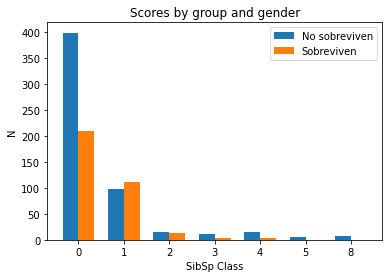

In [31]:
s1 = train.groupby("SibSp")["Survived"].apply(lambda x: x[x==1].count()).values
s0 = train.groupby("SibSp")["Survived"].apply(lambda x: x[x==0].count()).values
labels = [0, 1, 2, 3, 4, 5, 8]

width = 0.35 
fig, ax = plt.subplots()

x = np.arange(len(labels))

ax.bar(x - width/2, s0, width, label='No sobreviven')
ax.bar(x + width/2, s1, width, label='Sobreviven')

ax.set_xlabel('SibSp Class')
ax.set_ylabel('N')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [42]:
def cutsip(X):
    hasmap = {
        0: 0,
        1: 1, 
        2: 2,
        3: 2, 
        4: 2,
        5: 2, 
        8: 2 
    }
    DX = pd.DataFrame(X, columns=["X"])
    return DX.apply(lambda x: hasmap[x]).values

## Other

In [3]:
train2 = expand(train)
train2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Letter,Number,Many,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,NaN,NaN,False,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38.0,1,0,PC 17599,71.2833,C,85.0,False,C,True
2,3,3,"Heikkinen, Miss. Laina",True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,False,S,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35.0,1,0,113803,53.1000,C,123.0,False,S,True
4,5,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,NaN,NaN,False,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",False,27.0,0,0,211536,13.0000,NaN,NaN,False,S,False
887,888,1,"Graham, Miss. Margaret Edith",True,19.0,0,0,112053,30.0000,B,42.0,False,S,True
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",True,NaN,1,2,W./C. 6607,23.4500,NaN,NaN,False,S,False
889,890,1,"Behr, Mr. Karl Howell",False,26.0,0,0,111369,30.0000,C,148.0,False,C,True


In [72]:
train2.dtypes

PassengerId       int64
Pclass            int64
Name             object
Sex                bool
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Letter         category
Number          float64
Many               bool
Embarked         object
Survived           bool
dtype: object

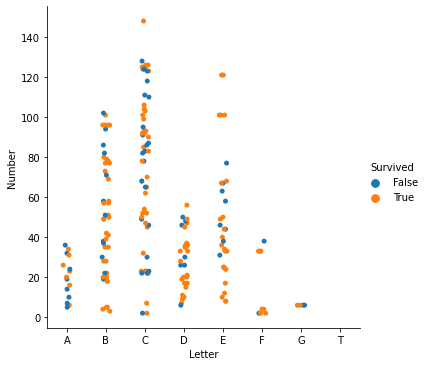

In [5]:
sns.catplot(x="Letter", y="Number", hue="Survived", data=train2)

TypeError: 'value' must be an instance of str or bytes, not a float

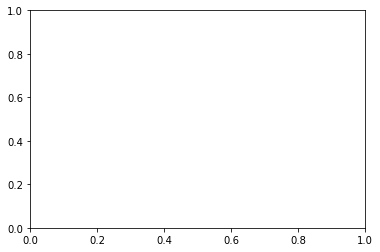

In [83]:
s1x = train2[train2["Survived"]==True]["Number"].values
s1y = train2[train2["Survived"]==True]["Letter"].values
s0x = train2[train2["Survived"]==False]["Number"].values
s0y = train2[train2["Survived"]==False]["Letter"].values


width = 0.35 
fig, ax = plt.subplots()
ax.scatter(x=s1x, y=s1y)